# Assumption Checking
# Evaluating Reliability of Inferential ANOVA Methods
## Dr Austin R Brown
## School of Data Science and Analytics
### Kennesaw State University

In [ ]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Random Block Design and Latin Squares"
#os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Random Block Design and Latin Squares'

## Introduction

- In the last section, we were introduced to the completely randomized design.

- Recall, one of the **key characteristics of a CRD** is that the treatments are assigned to the experimental units at random.

- Additionally, in CRD, we are assuming that we don't have any extraneous sources of variation that could affect the response variable.

    - In other words, we are assuming that the experimental units are homogeneous and that there is no other controllable source of variation (read, independent/explantory/lurking variable) that could affect the response variable.

- In practice, especially when working with humans, this is rarely the case.

## Example: Comparing Exercise Interventions in Adults with Type 2 Diabetes

- Let's consider an example. Suppose researchers at KSU are interested in understanding how different types of exercise impact blood sugar control (as measured by HbA1c percentage) in adults with Type 2 diabetes.

- The three different exercise interventions the researchers would like to compare are:

    1.  Aerobic Exercise (e.g., treadmill walking/jogging)
    2.  Resistance Training (e.g., weight lifting)
    3.  Combined Aerobic and Resistance Training

- Let's go through the process of designing an experiment to compare these three exercise interventions.

### Designing the Experiment

- The first step is to **Define the Objective**. I like to more generally think of this as specifying the research question.

    - This sets up the roadmap for how the experiment will be conducted and ultimately what information we are trying to glean from the experiment's results.

- Here, we want to know if there is a difference in HbA1c percentage among the three exercise interventions in the population of adults with Type 2 diabetes.

- Next, we want to **identify the outcome.** In this case, the outcome is the HbA1c percentage and is measured as a continuous variable.

    - For context, HbA1c percentage is a measure of the average blood sugar levels over the past 2-3 months. It is a key measure in the management of diabetes.

    - Normal values for HbA1c are typically less than 5.7%. Values between 5.7% and 6.4% are considered prediabetic, and values greater than 6.5% are considered diabetic.

- Next, we want to **identify the independent variables and possible lurking variables.**

    - Our primary independent variable is the type of exercise intervention. This is a categorical variable with three levels: Aerobic Exercise, Resistance Training, and Combined Aerobic and Resistance Training.

    - When we think about lurking variables, there are a few that potentially come to mind. One of which is baseline body composition, as typically measured by BMI category.
    - E.g., Underweight, Normal Weight, Overweight, Obese


    - A person's body composition can impact how they respond to exercise interventions. For example, individuals with higher body fat percentages may respond differently to exercise interventions than individuals with lower body fat percentages.

- Since our population of interest is adults with Type 2 diabetes in general, we know that there is likely to be a wide range of body compositions in our sample.

    - In other words, our experimental units are not homogeneous with respect to body composition.

- This is where the **Randomized Block Design (RBD)** comes into play.

## Randomized Block Design

- The randomized block design is a type of experimental design that is used when the experimental units are not homogeneous with respect to a particular variable.

    - BMI category in this case

- So what we do in this case is partition our sample into homogeneous subgroups called **blocks**. A blocking variable isn't necessarily of interest to us in our experiment, but it is a known, measurable, and likely source of variation that would be beneficial for us to account for/control.

- Then, we randomly assign levels of the treatment variable, exercise intervention in this case, to experimental units within each block.

    - This is a similar process to CRD randomization, but undertaken on each block independently.

- We also need to be clear on the **Data Collection Process and Procedures**.

- In this case, we would want to know the participants' BMI category at the onset of the study and for them to be part of the exercise intervention long enough to see measurable results, if appropriate.

- For us, we will have them participate for 12 weeks. We will assess their BMI category at the onset of the study and then at the end of the 12 weeks, we will measure each participant's HbA1c percentage.

- We will also recruit $r=30$ participants from each of the four BMI categories (the blocks). Then within each block, we will randomly assign them to one of the three exercise interventions for a total sample size of $N=120$.

### Descriptive Analysis

- How will using RBD change the descriptive and inferential methods we use to answer our research question?

    - Only a little bit! The general processes are the same!

- Let's start with our descriptive analyses. As before, we will perform some quantitative summaries (e.g., calculate sample means and sample standard deviations) and also generate some descriptive visualizations.

- Our data is contained in the `Exercise and Diabetes.xlsx` file.

In [ ]:
## Import Appropriate Libraries ##

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Import Data ##

exercise = pd.read_excel('Exercise and Diabetes.xlsx')

## Data Integrity Check ##

print(exercise.info())

## Calculate Means and Standard Deviations
## by BMI Group and Treatment Group ##

sum_stats = exercise.groupby(['BMI Category','Exercise Treatment'])['HbA1c'].agg(['mean','std'])

print(sum_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BMI Category        120 non-null    object 
 1   Exercise Treatment  120 non-null    object 
 2   HbA1c               120 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB
None
                                   mean       std
BMI Category  Exercise Treatment                 
Normal Weight Aerobic             7.275  0.214489
              Combined            7.110  0.219140
              Resistance          6.943  0.173657
Obese         Aerobic             7.796  0.207268
              Combined            7.431  0.400096
              Resistance          7.393  0.230557
Overweight    Aerobic             7.538  0.227928
              Combined            7.203  0.168394
              Resistance          7.022  0.261143
Underweight   Aerobic             7.304  0.3

- As we can see here, the mean HbA1c tends to increase within each BMI category as we move from Underweight to Normal Weight to Overweight to Obese.

- Additionally, within the exercise treatments, it looks like HbA1c tends to decrease as we move from Aerobic to Resistance to Combined. 

    - This may potentially indicate that the combined treatment is the most effective at reducing HbA1c levels, controlling for BMI category.

- Let's visually assess potential differences in HbA1c using a modified boxplot!

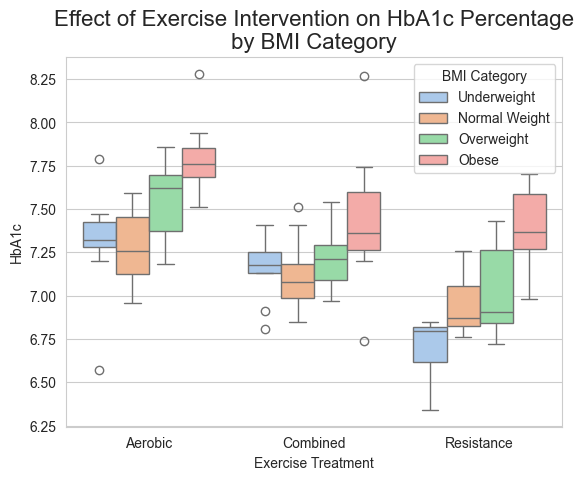

In [ ]:
## Step 1: Reorder the 'BMI Category' variable.
## Note, this step isn't strictly required but helpful
## in this case where we have natural ordering in the
## "BMI Category" variable. ##

## Specify Order ##

bmi_order = ["Underweight", "Normal Weight", "Overweight", "Obese"]

exercise['BMI Category'] = pd.Categorical(exercise['BMI Category'], 
                                          categories=bmi_order, 
                                          ordered=True)

## Step 2: Create the boxplot using seaborn. 
## We use the `order` and `hue_order` parameters to ensure the correct order.

sns.set_style("whitegrid")

sns.boxplot(
    data=exercise,
    x='Exercise Treatment',
    y='HbA1c',
    hue='BMI Category',
    hue_order=bmi_order, # Manually set the order of the hue variable
    palette='pastel' # Choose a color palette
)

## Step 3: Add labels and titles ##

plt.title("Effect of Exercise Intervention on HbA1c Percentage\nby BMI Category",
          loc='center',
          fontsize=16)

## Show the plot ##

plt.show()

- As we can see, the boxplot shows that the combined and resistance treatments tend to produce lower HbA1c levels than the aerobic treatment generally speaking.

- Additionally, it appears that the underweight and normal weight categories generally had lower HBA1c levels across the levels of the exercise treatment.

- So to conclude, it feels like the answer to our question is likely that the combined and resistance exercise interventions may be effective compared to the aerobic group.

    - Now let's see if we have statistical evidence to further confirm our suspicion.

### Inferential Analysis

- The model for the analysis of an RCB design is:

$$ y_{ij} = \mu + \tau_i + \beta_j + \varepsilon_{ij} $$

- where: 
    - $\beta_j$ represents the block effects and 
    - $\tau_i$ represents the treatment effects. 
    
- In general, we have $i=1,2,\dots t$ levels of the treatment variable and $j=1,2,\dots b$ levels of the blocking factor. This implies that we have $t\times b$ combinations of treatment and blocking effects.

- Supposing we have an equal number of $r$ replicates per each combination of treatment and blocking effect, we have a total of $t\times b \times r$ observations in our sample.

- As before, we assume $\varepsilon_{ij} \sim N(0,\sigma^2)$ which we can assess in a similar manner as CRD.

- For our omnibus test of this model, our **main test of concern is the test for the treatments effect.** We don't care too much about the hypothesis test for the blocking factor; we only want to include it in our model since it is a likely and known source of variation. 

- The null and alternative hypothesis for this effect is essentially the same as the CRD model:

$$ H_0: \mu_1 = \mu_2 = \dots = \mu_t $$ 

$$ H_1: \text{At least one pair of group means are not equal} $$

- The question is though: how is the test constructed? Here's where there are some noteworthy differences.

- The way the total amount of variance is estimated in a sample is through a measure called ***Sums of Squares Total (SST)***.

- As before, SST is just the sum of the squared differences between each observation and the grand mean. In the case of RBD:

$$ SST = \sum_{i=1}^t\sum_{j=1}^b(y_{ij} - \bar{y}_{\cdot\cdot})^2 $$

-   The logic behind all mostly supervised learning methods (i.e., those in which we have an outcome and predictors/independent variables/explanatory variables) is that the total amount of variation in the outcome can be partitioned into two categories:

    -   Explained variation (that is, variation in the response accounted for by the predictors)
    -   Unexplained variation (that is, variation in the response not accounted for by the predictors)

- With regards to SST, this means that we can break its value down into those two sources:

$$ SST = \text{Explained Variation} + \text{Unexplained Variation} $$

- This concept and equation are referred to as the ***Fundamental ANOVA Identity***.

- In CRD, Explained Variation was SSTreat and Unexplained Variation was SSE.

- For us here in RBD, we need to also account for the blocking effect in the computation of Explained Variation.

- So:

$$ \text{Explained Variation} = SSTreat + SSBlocks $$ 

$$ \text{Explained Variation} = b\sum_{i=1}^t(\bar{y}_{i\cdot} - \bar{y}_{\cdot\cdot})^2 + t\sum_{j=1}^{b}(\bar{y}_{\cdot j} - \bar{y}_{\cdot\cdot})^2 $$

- Here: 
    - $\bar{y}_{i\cdot}$ represents the sample mean of the $i$th treatment, 
    - $\bar{y}_{\cdot j}$ represents the sample mean of the $j$th block, and 
    - $\bar{y}_{\cdot\cdot}$ represents the overall sample mean.

- Compliling all of this into a standard ANOVA table:

**Table: ANOVA Table for Randomized Block Design with One Blocking Factor**

| Source      | SS         | df              | Mean Square                      | F-Ratio                  |
|-------------|------------|-----------------|----------------------------------|--------------------------|
| Treatments  | SSTreat    | \(t - 1\)       | \(\frac{SSTreat}{t - 1}\)        | \(\frac{MSTreat}{MSE}\)  |
| Blocks      | SSBlocks   | \(b - 1\)       | \(\frac{SSBlock}{b - 1}\)        |                          |
| Error       | SSE        | \((t - 1)(b - 1)\) | \(\frac{SSE}{(t - 1)(b - 1)}\) |                          |
| Total       | SST        | \(N - 1\)       |                                  |                          |
